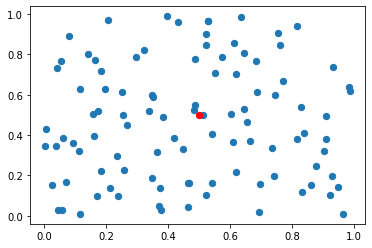

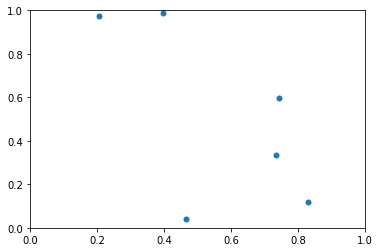

In [2]:
N_atoms =100
















































import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = '/home/carlos/anaconda3/bin/ffmpeg'


global xay, yay

dt   = 0.01
t    = 3.0 #time in seconds
N_t  = int(t/dt)
tay  = np.arange(0, t+dt, dt)
rate_constant = 1.0
rate_constant_dt = rate_constant * dt

xay   = np.random.rand(N_atoms)
yay   = np.random.rand(N_atoms)
#state = np.ones(N_atoms, dtype=bool)
#color = ['red'] * 100

plt.scatter(xay, yay, s=40) 
x = [0.5]
y = [0.5]
plt.scatter(x, y, color='red', s=40)
plt.savefig('atoms.png')
      
fig  = plt.figure()
ax    = plt.axes(xlim=(0, 1), ylim=(0, 1))
sc = ax.scatter([],[], s=25)

  
def init():
    global xay, yay
    sc.set_offsets(np.c_[xay, yay])
    return (sc,)

def animate(i):
    global xay, yay
    delete_ix = []
    for j,(x,y) in enumerate(zip(xay, yay)):
        if np.random.rand(1) < rate_constant_dt:
            delete_ix.append(j)
            
    xay = np.delete(xay, delete_ix)  
    yay = np.delete(yay, delete_ix)
    sc.set_offsets(np.c_[xay, yay])
    return (sc,)



























anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=N_t, interval=150, blit=False)


HTML(anim.to_html5_video())





